In [2]:
from run_simulation import run_simulation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_name = "gcc.trace"  # Replace with your actual trace file
simulations = {
    "rand": [(file_name, 4*i, "rand") for i in range(1, 33)],
    "lru": [(file_name, 4*i, "lru") for i in range(1, 33)],
    "clock": [(file_name, 4*i, "clock") for i in range(1, 33)],
}

In [4]:
total_results = {
    "rand": [],
    "lru": [],
    "clock": []
}

In [5]:
# Run simulations for all modes and store results in total_results
for mode in simulations.keys():
    for sim in simulations[mode]:
        input_file, frames, replacement_mode = sim

        results = run_simulation(input_file, frames, replacement_mode)
        total_results[mode].append(results)

In [6]:
data = []

for mode in total_results:
    if total_results[mode]:
        for sim, val in zip(simulations[mode], total_results[mode]):
            data.append({'Frames': sim[1], 'Page Hit': val[5], 'Exec Time': val[6], 'Mode': mode})

df = pd.DataFrame(data)

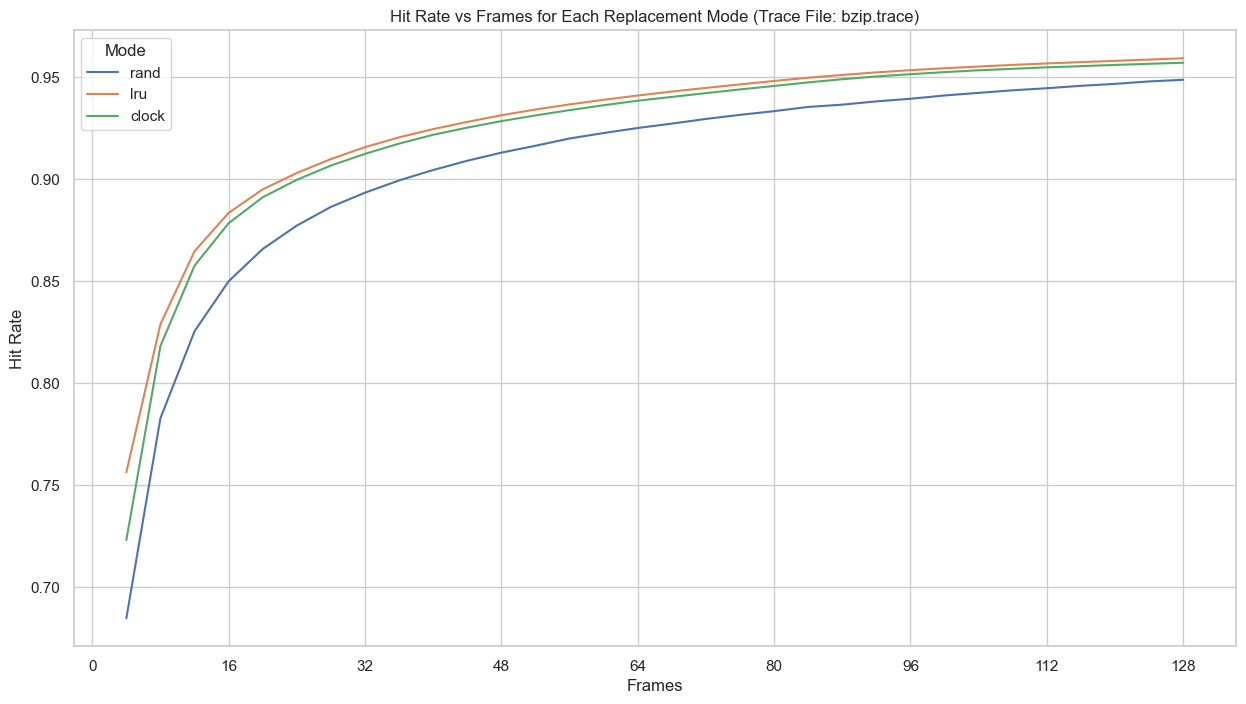

In [7]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 8))
sns.lineplot(x='Frames', y='Page Hit', hue='Mode', data=df)

plt.xlabel('Frames')
plt.ylabel('Hit Rate')
plt.title('Hit Rate vs Frames for Each Replacement Mode (Trace File: bzip.trace)')

frame_max = df['Frames'].max()
plt.xticks(range(0, frame_max + 1, 16))  # range(0, max_frame, step=4)

plt.show()

In [8]:
total_results

{'rand': [(4, 1000000, 315319, 54309, 315319, 0.684681, 1.1250267028808594),
  (8, 1000000, 217291, 37263, 217291, 0.782709, 0.6159219741821289),
  (12, 1000000, 174650, 29263, 174650, 0.82535, 0.5811717510223389),
  (16, 1000000, 150150, 24696, 150150, 0.84985, 0.5827932357788086),
  (20, 1000000, 134328, 21933, 134328, 0.865672, 0.58418869972229),
  (24, 1000000, 122851, 19961, 122851, 0.877149, 0.5723848342895508),
  (28, 1000000, 113672, 18481, 113672, 0.886328, 0.5632684230804443),
  (32, 1000000, 106725, 17335, 106725, 0.893275, 0.5570845603942871),
  (36, 1000000, 100705, 16328, 100705, 0.899295, 0.5589680671691895),
  (40, 1000000, 95607, 15299, 95607, 0.904393, 0.5559942722320557),
  (44, 1000000, 91063, 14691, 91063, 0.908937, 0.5550129413604736),
  (48, 1000000, 87098, 14097, 87098, 0.912902, 0.553762674331665),
  (52, 1000000, 83722, 13523, 83722, 0.916278, 0.5589456558227539),
  (56, 1000000, 80153, 12997, 80153, 0.919847, 0.5530893802642822),
  (60, 1000000, 77480, 12652,